# SARIMAX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To avoid seeing warnings
import warnings
warnings.filterwarnings('ignore')

##  [1. SARIMA](#1)

## [2. SARIMAX](#2)

## Performing a SARIMA MODEL
<a id='1'></a>

### 1. Reading the Dataset

In [5]:
df = pd.read_csv('../UPDATE_TSA_NOTEBOOKS/Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
weekday         478 non-null object
holiday         478 non-null int64
holiday_name    478 non-null object
rest1           478 non-null float64
rest2           478 non-null float64
rest3           478 non-null float64
rest4           478 non-null float64
total           478 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 33.6+ KB


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [11]:
cols=['rest1', 'rest2', 'rest3','rest4', 'total']
for i in cols:
    df1[i] = df1[i].astype(int)

In [12]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


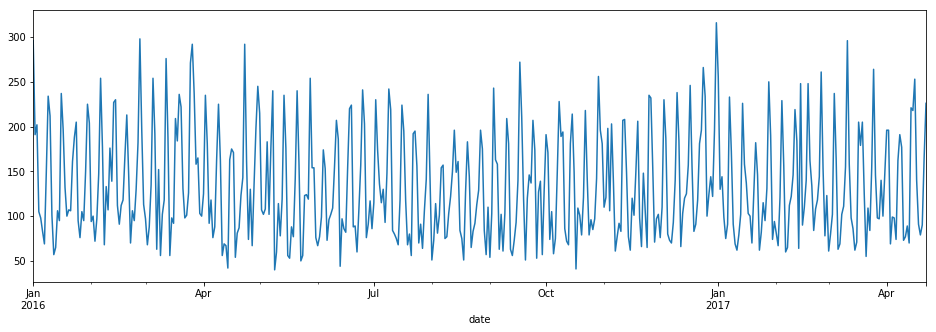

In [15]:
df1['total'].plot(figsize=(16,5));

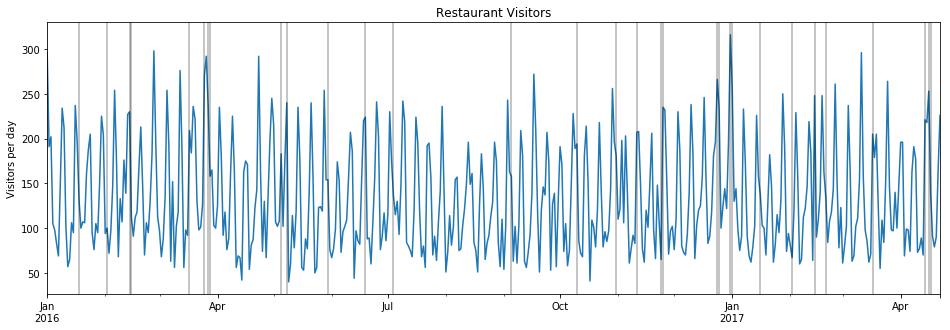

In [14]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = df1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df1.query('holiday==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='k', alpha = 0.3);  # add a semi-transparent grey line

### 2. Error Trend Seasonality Decomposition

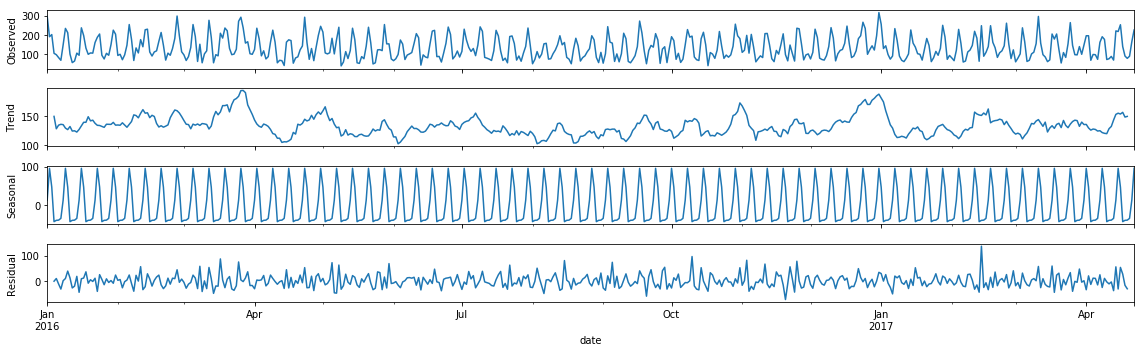

In [16]:
# model = 'additive' 'multiplicative'
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1['total'],model='add')
from pylab import rcParams
rcParams['figure.figsize'] = 16,5
result.plot();

___Very Strong Seasonal Component___

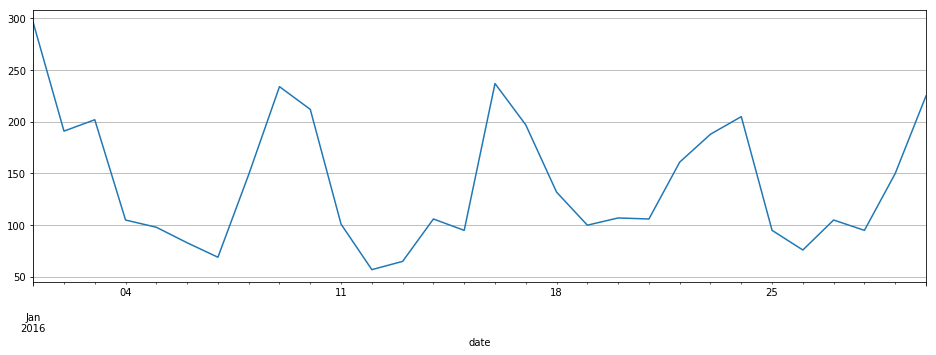

In [22]:
df1['total'].iloc[:30].plot(figsize=(16,5),grid=True);

___It looks like a weekly Seasonality___

### 3. Pyramid ARIMA

In [28]:
# Non Stationary Dataset
from pmdarima import auto_arima
# In this case the dataset has seasonality and m is every week = 7
stepwise_fit = auto_arima(df1['total'],seasonal=True,trace=True,m=7)
print(stepwise_fit)
# Best Model
stepwise_fit.summary()

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4936.412, BIC=4969.769, Fit time=2.851 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5269.484, BIC=5277.823, Fit time=0.028 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4916.749, BIC=4933.428, Fit time=0.924 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=5049.644, BIC=5066.322, Fit time=0.615 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5200.790, BIC=5213.298, Fit time=0.327 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4845.442, BIC=4866.290, Fit time=2.183 seconds


/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4859.825, BIC=4876.504, Fit time=2.639 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4846.676, BIC=4871.693, Fit time=2.814 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 0, 7); AIC=4866.549, BIC=4891.567, Fit time=2.833 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(2, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 17.563 seconds
ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 0, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 0, 0, 7), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 1) seasonal_order=(2, 0, 0, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Fri, 03 May 2019   AIC                           4845.442
Time:                                   20:46:24   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5657      4.363      4.714      0.000      12.014      29.117
ar.L1          0.1897      0.045      4.220      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.4032     86.679     16.468      0.000    1257.515    1597.292
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 4. Train Test Split

In [25]:
len(df1)

478

In [32]:
# Six weeks for Testing Data
train = df1.iloc[:436] 
test = df1.iloc[436:] 

### 5. SARIMA Model

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['total'],order=(1, 0, 0),seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Fri, 03 May 2019   AIC                           4457.403
Time:                                   20:51:08   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Predictions

In [35]:
start = len(train)
end = len(train) + len(test) - 1
# typ= 'levels' to return the differenced values to the original units
preds = results.predict(start=start,end=end,typ='levels').rename('SARIMA (p,d,q)(P,D,Q,m) Predictions')

### 7. Plotting

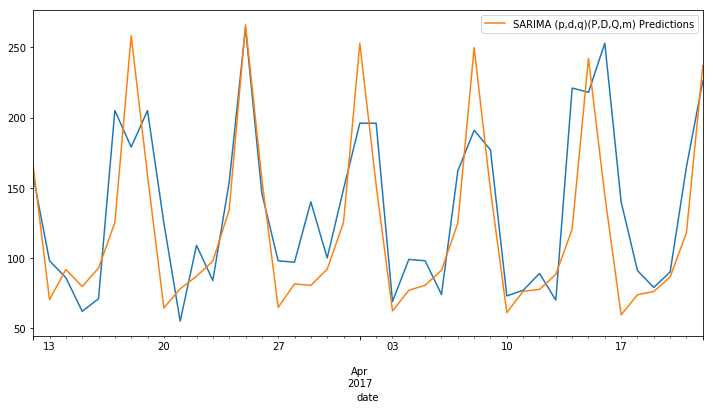

In [36]:
test['total'].plot(figsize=(12,6))
preds.plot(legend=True);

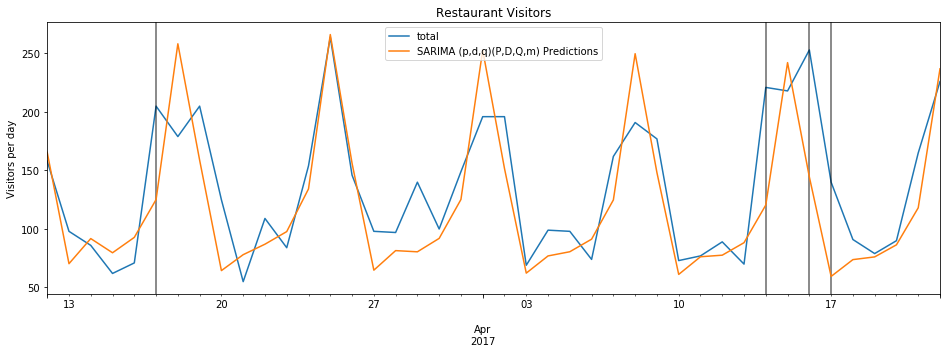

In [46]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = test['total'].plot(figsize=(16,5),title=title, legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='k', alpha = 0.6);  # add a semi-transparent grey line
preds.plot(legend=True);

___There are holidays in our testing data and our predcitions are not quite good cause this___

### 8. Evaluate the Model

In [38]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['total'],preds) # Compare it with test.mean()
error

41.26315491179164

In [39]:
test['total'].mean()

134.26190476190476

___Not Pretty Good___

## Performing a SARIMAX MODEL

<a id='2'></a>

In [49]:
# Non Stationary Dataset
from pmdarima import auto_arima
# In this case the dataset has seasonality and m is every week = 7
stepwise_fit = auto_arima(df1['total'],exogenous=df1[['holiday']],seasonal=True,trace=True,m=7)
print(stepwise_fit)
# Best Model
stepwise_fit.summary()

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 7); AIC=4839.184, BIC=4876.710, Fit time=5.503 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5235.582, BIC=5248.091, Fit time=0.142 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=4797.240, BIC=4818.088, Fit time=2.196 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=4969.638, BIC=4990.486, Fit time=1.598 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=5171.193, BIC=5187.871, Fit time=0.585 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4756.026, BIC=4781.044, Fit time=3.258 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 0, 1, 7); AIC=4803.456, BIC=4832.643, Fit time=3.591 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 0) seasonal_order=(2, 0, 0, 7); AIC=4714.928, BIC=4735.776, Fit time=3.124 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/eduardo/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(1, 0, 2) seasonal_order=(2, 0, 0, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 0, 0, 7); AIC=4709.323, BIC=4734.341, Fit time=2.479 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(2, 0, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 0, 7); AIC=4785.247, BIC=4806.095, Fit time=1.318 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(0, 0, 1) seasonal_order=(2, 0, 1, 7); AIC=4939.053, BIC=4968.240, Fit time=3.879 seconds


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 0, 7); AIC=4747.702, BIC=4776.889, Fit time=4.182 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(2, 0, 0, 7); AIC=4734.360, BIC=4763.548, Fit time=3.051 seconds
Total fit time: 35.102 seconds
ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 0, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 0, 0, 7), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)


/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 0, 7)   Log Likelihood               -2348.662
Date:                           Fri, 03 May 2019   AIC                           4709.323
Time:                                   21:54:21   BIC                           4734.341
Sample:                                        0   HQIC                          4719.159
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.5555      4.274      2.704      0.007       3.180      19.931
x1            74.8356      4.545     16.464      0.000      65.927      83.744
ma.L1          0.1782      0.051      3.474      0.001       0.078       0.279
ar.S.L7        0.5059      0.045     11.232      0.000       0.418       0.594
ar.S.L14       0.3843      0.043      8.982      0.000       0.300       0.468
sigma2      1142.0212     80.192     14.241      0.000     984.849    1299.194
===================================================================================
Ljung-Box (Q):                       85.07   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.89   Skew:                             0.12
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### SARIMAX Model

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['total'],exog=train[['holiday']],order=(0,0,1),seasonal_order=(2, 0, 1, 7))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(0, 0, 1)x(2, 0, 1, 7)   Log Likelihood               -2089.823
Date:                           Fri, 03 May 2019   AIC                           4191.647
Time:                                   21:57:23   BIC                           4216.112
Sample:                               01-01-2016   HQIC                          4201.302
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.7762      3.855     18.102      0.000      62.221      77.331
ma.L1          0.1929      0.047      4.083      0.000       0.100       0.285
ar.S.L7        1.0229      0.057     18.092      0.000       0.912       1.134
ar.S.L14      -0.0229      0.057     -0.406      0.685      -0.134       0.088
ma.S.L7       -0.9515      0.023    -41.160      0.000      -0.997      -0.906
sigma2       783.8678     45.344     17.287      0.000     694.996     872.740
===================================================================================
Ljung-Box (Q):                       36.81   Jarque-Bera (JB):                20.09
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.23
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predictions

In [52]:
start = len(train)
end = len(train) + len(test) - 1
# typ= 'levels' to return the differenced values to the original units
preds = results.predict(start=start,end=end,exog=test[['holiday']],typ='levels').rename('SARIMAX (p,d,q)(P,D,Q,m) Predictions')

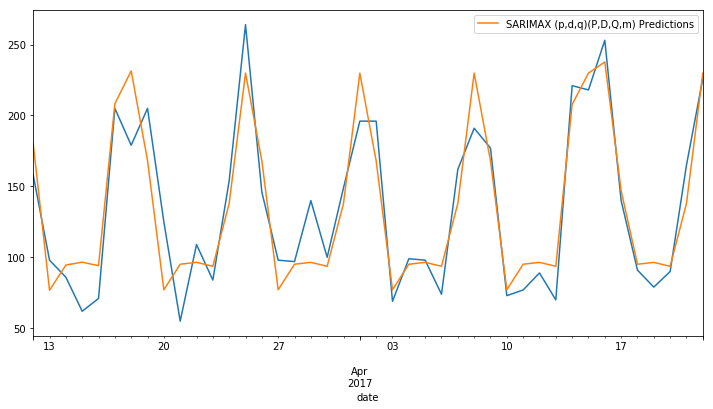

In [53]:
test['total'].plot(figsize=(12,6))
preds.plot(legend=True);

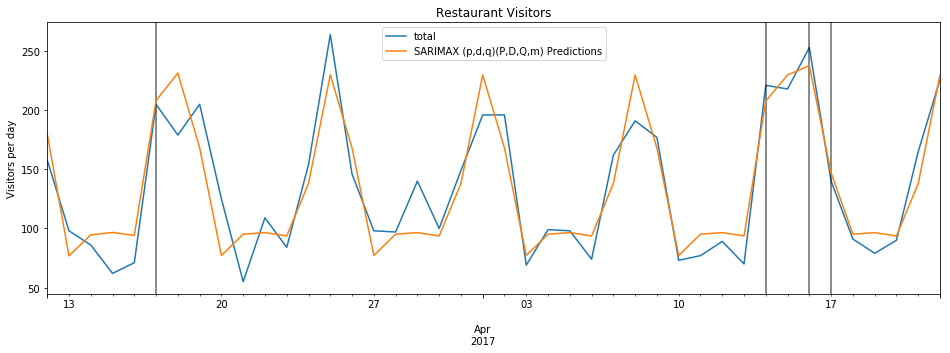

In [55]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = test['total'].plot(figsize=(16,5),title=title, legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='k', alpha = 0.6);  # add a semi-transparent grey line
preds.plot(legend=True);

### Evaluate the Model

In [57]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['total'],preds) # Compare it with test.mean()
error

23.197169909313008

In [58]:
test['total'].mean()

134.26190476190476

___Better than SARIMA RMSE Error___

### Forecast for Future Data

In [60]:
# Refit with all the Data
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(0,0,1),seasonal_order=(2, 0, 1, 7)) # Order is chosen from Pyramid ARIMA
results = model.fit()
results.summary()

/home/eduardo/.local/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(0, 0, 1)x(2, 0, 1, 7)   Log Likelihood               -2284.089
Date:                           Fri, 03 May 2019   AIC                           4580.178
Time:                                   22:07:00   BIC                           4605.196
Sample:                               01-01-2016   HQIC                          4590.014
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.8753      3.768     18.545      0.000      62.490      77.260
ma.L1          0.1548      0.045      3.405      0.001       0.066       0.244
ar.S.L7        1.0280      0.052     19.686      0.000       0.926       1.130
ar.S.L14      -0.0280      0.052     -0.537      0.592      -0.130       0.074
ma.S.L7       -0.9606      0.022    -44.352      0.000      -1.003      -0.918
sigma2       770.3432     43.497     17.710      0.000     685.090     855.597
===================================================================================
Ljung-Box (Q):                       39.52   Jarque-Bera (JB):                20.03
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.22
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
# Forecasting
exog_forecast = df[478:][['holiday']]
start = len(df1)
end = len(df1) + 38
# typ= 'levels' to return the differenced values to the original units
forecasted_values = results.predict(start=start,end=end,exog=exog_forecast,typ='levels').rename('SARIMAX (p,d,q)(P,D,Q) Forecast')

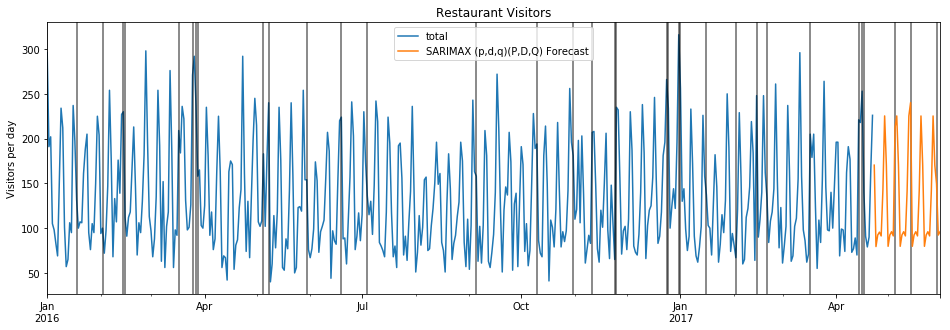

In [67]:
ax = df['total'].plot(figsize=(16,5),title=title, legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df.query('holiday==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='k', alpha = 0.6); 
forecasted_values.plot(legend=True);